<a href="https://colab.research.google.com/github/Melvinmcrn/DataScience/blob/master/Intermediate_Statistics_Demo_v2_toStudent_155946_1581411771_1058.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate-Statistics (Demo)
## 1.One -Way ANOVA
## 2.F-Test
## 3.Correlation
## 4.Chi-Squared Test (Contingency; Confusion Table)
## 5.Linear Regression
* ### 5.1.Student Alcohol Consumption prediction 
* ### 5.2.Forward, Backward, Stepwise

## 6.Logistic Regression (only numeric inputs)
* ### 6.1.Direct Target Marketing : Purchase(Yes/No)

## 7.MonteCarlo (Optimization)

![](https://media0.giphy.com/media/9ADoZQgs0tyww/giphy.gif)

In [0]:
#Importing required libraries
#Importing the required libraries and data set 
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

print("Important libraries loaded successfully")

Important libraries loaded successfully


# 1.One -Way ANOVA

In [0]:
A = [12.6, 12, 11.8, 11.9, 13, 12.5, 14]
B = [10, 10.2, 10, 12, 14, 13]
C = [10.1, 13, 13.4, 12.9, 8.9, 10.7, 13.6, 12]

In [0]:
all_salaryK = A + B + C
company_names = (['A'] * len(A)) +  (['B'] * len(B)) +  (['C'] * len(C))

In [0]:
data = pd.DataFrame({'company': company_names, 'salaryK': all_salaryK})

In [0]:
data.head(20)

,company,salaryK
0,A,12.6
1,A,12.0
2,A,11.8
3,A,11.9
4,A,13.0
5,A,12.5
6,A,14.0
7,B,10.0
8,B,10.2
9,B,10.0


In [0]:
data.groupby('company').mean()

,salaryK
company,
A,12.542857
B,11.533333
C,11.825000


In [0]:
lm = ols('salaryK ~ company',data=data).fit()
table = sm.stats.anova_lm(lm)
print(table)

            df     sum_sq   mean_sq         F    PR(>F)
company    2.0   3.606905  1.803452  0.821297  0.455683
Residual  18.0  39.525476  2.195860       NaN       NaN


#2.F-Test (Continue from Demo 1)

We use the Mean Squares to compute the F statistic as the ratio between explained vs unexplained variation:

![](https://miro.medium.com/max/221/1*IOV_eIIQHXZq4taC0lLn2A.png)


In [0]:
data.head(20)

,company,salaryK
0,A,12.6
1,A,12.0
2,A,11.8
3,A,11.9
4,A,13.0
5,A,12.5
6,A,14.0
7,B,10.0
8,B,10.2
9,B,10.0


In [0]:
# compute overall mean
overall_mean = data['salaryK'].mean()
overall_mean

11.980952380952381

In [0]:
# compute Sum of Squares Total
data['overall_mean'] = overall_mean
ss_total = sum((data['salaryK'] - data['overall_mean'])**2)
ss_total

43.132380952380956

In [0]:
# compute group means
group_means = data.groupby('company').mean()
group_means = group_means.rename(columns = {'salaryK': 'group_mean'})
group_means

,group_mean,overall_mean
company,,
A,12.542857,11.980952
B,11.533333,11.980952
C,11.825000,11.980952


In [0]:
# add group means and overall mean to the original data frame
data = data.merge(group_means, left_on = 'company', right_index = True)
data

,company,salaryK,overall_mean_x,group_mean,overall_mean_y
0,A,12.6,11.980952,12.542857,11.980952
1,A,12.0,11.980952,12.542857,11.980952
2,A,11.8,11.980952,12.542857,11.980952
3,A,11.9,11.980952,12.542857,11.980952
4,A,13.0,11.980952,12.542857,11.980952
5,A,12.5,11.980952,12.542857,11.980952
6,A,14.0,11.980952,12.542857,11.980952
7,B,10.0,11.980952,11.533333,11.980952
8,B,10.2,11.980952,11.533333,11.980952
9,B,10.0,11.980952,11.533333,11.980952


In [0]:
# compute Sum of Squares Residual
ss_residual = sum((data['salaryK'] - data['group_mean'])**2)
ss_residual

39.52547619047619

In [0]:
# compute Sum of Squares Model
overall_mean = data['salaryK'].mean()
ss_explained = sum((overall_mean - data['group_mean'])**2)
ss_explained

3.6069047619047776

In [0]:
# compute Mean Square Residual
n_groups = len(set(data['company']))
n_obs = data.shape[0]
df_residual = n_obs - n_groups
ms_residual = ss_residual / df_residual
ms_residual

2.1958597883597886

In [0]:
# compute Mean Square Explained
df_explained = n_groups - 1
ms_explained = ss_explained / df_explained
ms_explained

1.8034523809523888

In [0]:
f = ms_explained / ms_residual
f

0.8212966923081592

In [0]:
# compute p-value (Optional)
import scipy.stats
p_value = 1 - scipy.stats.f.cdf(f, df_explained, df_residual)
p_value

0.4556832940515221

#3.Correlation


![](http://moziru.com/images/hosue-clipart-sold-1.png)

Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's




In [0]:
houseprice_df = pd.read_csv('https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/MOOC/BostonHouse/boston_house.csv', sep=';')

In [0]:
houseprice_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,396.90,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,396.90,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,392.83,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,394.63,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,396.90,36.2


In [0]:
# correlation
houseprice_df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,B,PRICE
CRIM,1.000000,-0.288969,0.586719,0.066246,-0.139448,-0.185045,0.462470,-0.312843,-0.151996,0.754267,-0.053260,-0.286245
ZN,-0.288969,1.000000,-0.491587,-0.066072,0.038450,0.078721,-0.488006,0.268317,0.062767,-0.256770,0.015810,0.331570
INDUS,0.586719,-0.491587,1.000000,0.133738,-0.394483,-0.448809,0.700699,-0.605973,-0.427834,0.748946,0.233471,-0.411915
CHAS,0.066246,-0.066072,0.133738,1.000000,-0.084122,-0.091826,0.154596,-0.132448,-0.092165,0.070911,0.087542,0.154409
NOX,-0.139448,0.038450,-0.394483,-0.084122,1.000000,0.975767,-0.550065,0.923503,0.985957,-0.570564,-0.856608,-0.332778
RM,-0.185045,0.078721,-0.448809,-0.091826,0.975767,1.000000,-0.595786,0.946946,0.992620,-0.611174,-0.848289,0.740181
AGE,0.462470,-0.488006,0.700699,0.154596,-0.550065,-0.595786,1.000000,-0.744068,-0.585574,0.635768,0.417216,-0.299893
DIS,-0.312843,0.268317,-0.605973,-0.132448,0.923503,0.946946,-0.744068,1.000000,0.947606,-0.689406,-0.778075,0.138798
RAD,-0.151996,0.062767,-0.427834,-0.092165,0.985957,0.992620,-0.585574,0.947606,1.000000,-0.586760,-0.861694,-0.217902
TAX,0.754267,-0.256770,0.748946,0.070911,-0.570564,-0.611174,0.635768,-0.689406,-0.586760,1.000000,0.373021,-0.345898


In [0]:
houseprice_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'B', 'PRICE'],
      dtype='object')

In [0]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'B', 'PRICE']

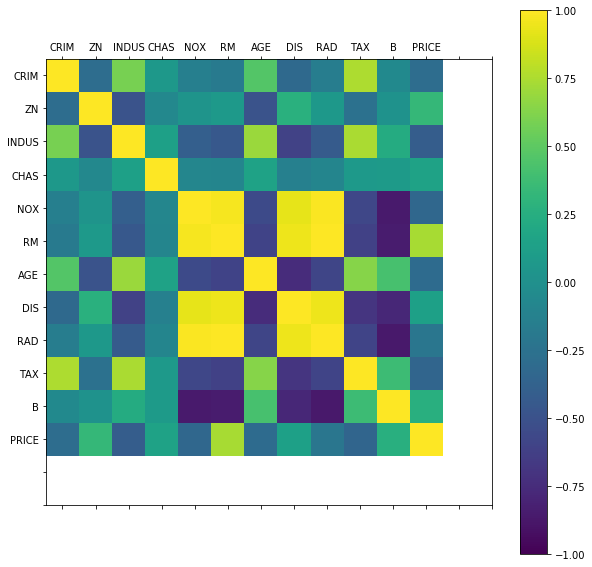

In [0]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(houseprice_df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
fig.set_size_inches(10,10)
pyplot.show()

#4.Chi-Squared Test (Contingency; Confusion Table)


In [0]:
!pip install researchpy

In [0]:
import researchpy as rp
from scipy import stats

df = pd.read_csv("https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/mental-heath-in-tech.csv")

In [0]:
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [0]:
rp.summary_cat(df[['Do you currently have a mental health disorder?', 'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?' ]])

,Variable,Outcome,Count,Percent
0,Do you currently have a mental health disorder?,Yes,575,40.13
1,,No,531,37.06
2,,Maybe,327,22.82
3,Would you have been willing to discuss a menta...,Some of my previous employers,654,51.74
4,,"No, at none of my previous employers",416,32.91
5,,I don't know,101,7.99
6,,"Yes, at all of my previous employers",93,7.36


In [0]:
def drop_maybe(series):
    if series.lower() == 'yes' or series.lower() == 'no':
        return series
    else:
        return

In [0]:
df['current_mental_disorder'] = df['Do you currently have a mental health disorder?'].apply(drop_maybe)
df['willing_discuss_mh_supervisor'] = df['Would you have been willing to discuss a mental health issue with your direct supervisor(s)?']
rp.summary_cat(df[['current_mental_disorder', 'willing_discuss_mh_supervisor']])

,Variable,Outcome,Count,Percent
0,current_mental_disorder,Yes,575,51.99
1,,No,531,48.01
2,willing_discuss_mh_supervisor,Some of my previous employers,654,51.74
3,,"No, at none of my previous employers",416,32.91
4,,I don't know,101,7.99
5,,"Yes, at all of my previous employers",93,7.36


In [0]:
pd.crosstab(df['willing_discuss_mh_supervisor'], df['current_mental_disorder'])

current_mental_disorder,No,Yes
willing_discuss_mh_supervisor,,
I don't know,51,29
"No, at none of my previous employers",119,194
Some of my previous employers,237,267
"Yes, at all of my previous employers",51,24


In [0]:
crosstab = pd.crosstab(df['willing_discuss_mh_supervisor'], df['current_mental_disorder'])
crosstab

current_mental_disorder,No,Yes
willing_discuss_mh_supervisor,,
I don't know,51,29
"No, at none of my previous employers",119,194
Some of my previous employers,237,267
"Yes, at all of my previous employers",51,24


In [0]:
stats.chi2_contingency(crosstab)

(32.408194625396376,
 4.292859793048239e-07,
 3,
 array([[ 37.69547325,  42.30452675],
        [147.48353909, 165.51646091],
        [237.48148148, 266.51851852],
        [ 35.33950617,  39.66049383]]))

In [0]:
table, results = rp.crosstab(df['willing_discuss_mh_supervisor'], df['current_mental_disorder'], prop= 'col', test= 'chi-square')
table

current_mental_disorder                
                                                          No     Yes     All
willing_discuss_mh_supervisor                                               
I don't know                                           11.14    5.64    8.23
No, at none of my previous employers                   25.98   37.74   32.20
Some of my previous employers                          51.75   51.95   51.85
Yes, at all of my previous employers                   11.14    4.67    7.72
All                                                   100.00  100.00  100.00

In [0]:
results

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,32.4082
1,p-value =,0.0000
2,Cramer's V =,0.1826


#5.Linear Regression (Play with Student Alcohol Consumption Corpus)


Reference of Data Set: https://www.kaggle.com/uciml/student-alcohol-consumption

 ![](https://scontent-yyz1-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c180.0.1079.1079a/s640x640/70199188_954316201572050_3255215538695518813_n.jpg?_nc_ht=scontent-yyz1-1.cdninstagram.com&_nc_cat=102&_nc_ohc=L2qCNIf88XQAX_ULy7_&oh=dc15ac7019db6a0f10b050e09cb163c7&oe=5ECB96C9)

In [0]:
# Importing and combining datasets
df1 = pd.read_csv("https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/student-alcohol-consumption/student-mat.csv")
df2 = pd.read_csv("https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/student-alcohol-consumption/student-por.csv")
df3 = pd.concat([df1,df2])
df3.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [0]:
df3=df3.drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])
df3.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [0]:
df3.info()
#Drop the columns which is not essentials for grade prediction
df3 = df3.drop(['famsize', 'Pstatus', 'Fjob', 'Mjob'],axis=1)
df3 = df3.drop(['reason','traveltime', 'studytime', 'failures'],axis=1)
df3 = df3.drop(['schoolsup','famsup', 'paid', 'nursery', 'internet', 'freetime'],axis=1)
df3 = df3.drop(['higher', 'health'],axis=1)
df3.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 642
Data columns (total 33 columns):
school        662 non-null object
sex           662 non-null object
age           662 non-null int64
address       662 non-null object
famsize       662 non-null object
Pstatus       662 non-null object
Medu          662 non-null int64
Fedu          662 non-null int64
Mjob          662 non-null object
Fjob          662 non-null object
reason        662 non-null object
guardian      662 non-null object
traveltime    662 non-null int64
studytime     662 non-null int64
failures      662 non-null int64
schoolsup     662 non-null object
famsup        662 non-null object
paid          662 non-null object
activities    662 non-null object
nursery       662 non-null object
higher        662 non-null object
internet      662 non-null object
romantic      662 non-null object
famrel        662 non-null int64
freetime      662 non-null int64
goout         662 non-null int64
Dalc          662 no

Index(['school', 'sex', 'age', 'address', 'Medu', 'Fedu', 'guardian',
       'activities', 'romantic', 'famrel', 'goout', 'Dalc', 'Walc', 'absences',
       'G1', 'G2', 'G3'],
      dtype='object')

In [0]:
df3.describe()

,age,Medu,Fedu,famrel,goout,Dalc,Walc,absences,G1,G2,G3
count,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000,662.000000
mean,16.812689,2.492447,2.293051,3.938066,3.172205,1.504532,2.282477,4.930514,10.728097,10.708459,10.725076
std,1.269194,1.130958,1.094027,0.941930,1.161907,0.926567,1.290121,6.858060,3.082098,3.529588,4.106738
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,4.000000,2.000000,1.000000,1.000000,0.000000,8.000000,9.000000,9.000000
50%,17.000000,2.000000,2.000000,4.000000,3.000000,1.000000,2.000000,3.000000,10.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,5.000000,4.000000,2.000000,3.000000,8.000000,13.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [0]:
df3.corr()

,age,Medu,Fedu,famrel,goout,Dalc,Walc,absences,G1,G2,G3
age,1.000000,-0.119031,-0.133645,-0.008453,0.094744,0.130655,0.069320,0.168313,-0.113206,-0.130408,-0.127446
Medu,-0.119031,1.000000,0.635156,0.010211,0.022866,-0.018013,-0.036381,0.095703,0.208172,0.202776,0.182611
Fedu,-0.133645,0.635156,1.000000,0.016171,0.053071,-0.008774,0.032370,0.068048,0.185636,0.156541,0.137159
famrel,-0.008453,0.010211,0.016171,1.000000,0.091317,-0.069881,-0.092647,-0.067647,0.060893,0.052807,0.061296
goout,0.094744,0.022866,0.053071,0.091317,1.000000,0.252217,0.404503,0.025046,-0.093786,-0.091030,-0.081691
Dalc,0.130655,-0.018013,-0.008774,-0.069881,0.252217,1.000000,0.618431,0.125517,-0.112935,-0.084944,-0.075212
Walc,0.069320,-0.036381,0.032370,-0.092647,0.404503,0.618431,1.000000,0.131147,-0.131321,-0.102820,-0.084689
absences,0.168313,0.095703,0.068048,-0.067647,0.025046,0.125517,0.131147,1.000000,-0.050925,-0.042650,-0.004601
G1,-0.113206,0.208172,0.185636,0.060893,-0.093786,-0.112935,-0.131321,-0.050925,1.000000,0.841436,0.796569
G2,-0.130408,0.202776,0.156541,0.052807,-0.091030,-0.084944,-0.102820,-0.042650,0.841436,1.000000,0.913548


In [0]:
#Getting dummies
df3 = pd.get_dummies(df3, drop_first=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 662 entries, 0 to 642
Data columns (total 18 columns):
age                662 non-null int64
Medu               662 non-null int64
Fedu               662 non-null int64
famrel             662 non-null int64
goout              662 non-null int64
Dalc               662 non-null int64
Walc               662 non-null int64
absences           662 non-null int64
G1                 662 non-null int64
G2                 662 non-null int64
G3                 662 non-null int64
school_MS          662 non-null uint8
sex_M              662 non-null uint8
address_U          662 non-null uint8
guardian_mother    662 non-null uint8
guardian_other     662 non-null uint8
activities_yes     662 non-null uint8
romantic_yes       662 non-null uint8
dtypes: int64(11), uint8(7)
memory usage: 66.6 KB


In [0]:
# define target variable and training and test sets
X = df3.drop("G3",axis=1)
Y = df3["G3"]
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2020)

##5.1. Student Alcohol Consumption prediction 


In [0]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##5.2.Forward, Backward, Stepwise


In [0]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Building Optimal Model using Backward Elimination
import statsmodels.api as sm
X_opt = X
regressor_OLS = sm.OLS(endog =Y, exog = X_opt).fit()
regressor_OLS.summary()

#Backward Eliminiation Process
#Drop the variable which is not significant(p>0.05)
X_opt = X.drop(['goout','activities_yes', 'address_U', 'school_MS', 'sex_M', 'guardian_mother'], axis=1)
regressor_OLS = sm.OLS(endog =Y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     G3   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              2835.
Date:                Tue, 11 Feb 2020   Prob (F-statistic):                        0.00
Time:                        01:51:58   Log-Likelihood:                         -1267.6
No. Observations:                 662   AIC:                                      2557.
Df Residuals:                     651   BIC:                                      2607.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
age               -0.0663      0.023     -2.903      0.004      -0.111      -0.021
Medu              -0.0139      0.075     -0.186      0.853      -0.161       0.133
Fedu              -0.0702      0.077     -0.914      0.361      -0.221       0.081
famrel             0.0477      0.067      0.711      0.478      -0.084       0.179
Dalc              -0.0033      0.090     -0.037      0.971      -0.180       0.173
Walc               0.0278      0.065      0.428      0.668      -0.100       0.155
absences           0.0266      0.010      2.721      0.007       0.007       0.046
G1                 0.1365      0.039      3.501      0.000       0.060       0.213
G2                 0.9602      0.034     28.195      0.000       0.893       1.027
guardian_other    -0.1371      0.245     -0.559      0.576      -0.618       0.344
romantic_yes      -0.1964      0.138     -1.426      0.154      -0.467       0.074
==============================================================================
Omnibus:                      423.930   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4336.206
Skew:                          -2.782   Prob(JB):                         0.00
Kurtosis:                      14.236   Cond. No.                         92.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#6.Logistic Regression (only numeric inputs)


In [0]:
ds = pd.read_csv('https://github.com/kaopanboonyuen/Python-Data-Science/raw/master/Dataset/advertising.csv')

In [0]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [0]:
ds.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
y = ds['Clicked on Ad']
X = ds[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###6.1.Direct Target Marketing : Purchase(Yes/No)


In [0]:
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [0]:
print(classification_report(y_test, y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       136
           1       0.99      0.96      0.98       114

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



[[135   1]
 [  4 110]]


In [0]:
model.coef_

array([[-2.48433792,  1.03334826, -1.47633287, -2.37579962, -0.12886094]])

In [0]:
model.intercept_

array([1.48849751])

#7.MonteCarlo (Optimization)

Credit: https://github.com/ranaroussi/pandas-montecarlo


In [0]:
!pip install pandas_montecarlo --upgrade --no-cache-dir 

Requirement already up-to-date: pandas_montecarlo in /usr/local/lib/python3.6/dist-packages (0.0.2)


Let's run a monte carlo simulation on the returns of SPY (S&P 500 Spider ETF).

First, let's download SPY's data and calculate the daily returns.

![](https://raw.githubusercontent.com/ranaroussi/pandas-montecarlo/master/demo.png)

In [0]:
from pandas_datareader import data

df = data.get_data_yahoo("SPY")
df['return'] = df['Adj Close'].pct_change().fillna(0)

In [0]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,return
Date,,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,92.788483,0.000000
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,93.034081,0.002647
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,93.099579,0.000704
2010-01-07,114.330002,113.180000,113.500000,114.190002,131091100.0,93.492622,0.004222
2010-01-08,114.620003,113.660004,113.889999,114.570000,126402800.0,93.803726,0.003328


In [0]:
import pandas_montecarlo
mc = df['return'].montecarlo(sims=10, bust=-0.1, goal=1)

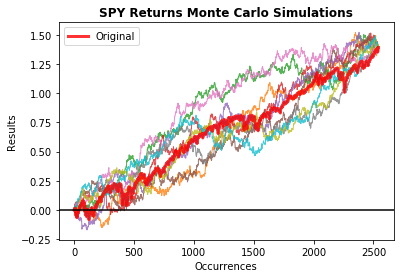

In [0]:
mc.plot(title="SPY Returns Monte Carlo Simulations")  # optional: , figsize=(x, y)

In [0]:
print(mc.stats) # Show test stats

{'min': 1.3919388565988917, 'max': 1.391938856598894, 'mean': 1.3919388565988926, 'median': 1.3919388565988926, 'std': 7.656157510037639e-16, 'maxdd': -0.17108989615842352, 'bust': 0.2, 'goal': 0.8}


In [0]:
print(mc.maxdd) # Show bust / max drawdown stats

{'min': -0.17108989615842352, 'max': -0.00864017987474941, 'mean': -0.06418126010605162, 'median': -0.05789152845195711, 'std': 0.061136599824424105}


In [0]:
print(mc.data.head()) # Access raw simulations' DataFrame

   original         1         2  ...         7         8         9
0  0.000000 -0.005129  0.003322  ...  0.000467 -0.003010  0.000682
1  0.002647 -0.006702  0.017795  ...  0.000544  0.001825  0.007878
2  0.000704  0.002310  0.002667  ...  0.000730 -0.001766  0.005173
3  0.004222 -0.012824 -0.004076  ...  0.010944  0.001247  0.000386
4  0.003328 -0.000462 -0.000795  ... -0.004682  0.002687  0.008501

[5 rows x 10 columns]
